# Allie Surina

---



## Capstone Project: Predicting Disabled List Placements 

### Project Goal: 
To game log data for MLB games from 2000 - 2016, along with whether a player was placed on the Disabled List after a particular game (i.e. he was injured during his previous game), and predict whether a a Disabled List placement will happen to a starting player for a game.

### Data:
* `games_dls.csv` Merged data from `games.csv` and `injury.csv` that is the basis of the model.

### Methods:
* I plan to use machine learning classification model to predict whether a disabled list placement will happen after a particular game.

## Import Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

---



## Import Data

In [6]:
# Import the game and disabled list merged data from games_dls.csv
file = './datasets/games_features_for_model.csv'
df = pd.read_csv(file,index_col=0)

---


## Import Sklearn Packages for Model Building

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,\
                        precision_score, classification_report, roc_curve, auc 
from sklearn.feature_selection import RFE

---


## Clean the Data

In [8]:
df.drop('date', axis=1,inplace=True)

### Injury columns is multi-class, so I need to create a binary column:

In [9]:
df.injury = df.injury.map(lambda x: 1 if x>0 else 0)
df.injury.value_counts()

0    36399
1     4893
Name: injury, dtype: int64

In [10]:
cols = [col for col in df.columns if 'injury' not in col]
X = df.loc[:,cols]
y = df.loc[:,'injury']

In [11]:
X.shape

(41292, 180)

In [12]:
X.index = pd.to_datetime(X.index)

In [13]:
print(X.iloc[4,70:130])

day_Wed       0.0
v_team_ARI    0.0
v_team_ATL    0.0
v_team_BAL    0.0
v_team_BOS    0.0
v_team_CHA    0.0
v_team_CHN    0.0
v_team_CIN    0.0
v_team_CLE    0.0
v_team_COL    0.0
v_team_DET    0.0
v_team_FLO    0.0
v_team_HOU    0.0
v_team_KCA    0.0
v_team_LAN    0.0
v_team_MIA    0.0
v_team_MIL    0.0
v_team_MIN    0.0
v_team_MON    0.0
v_team_NYA    0.0
v_team_NYN    0.0
v_team_OAK    0.0
v_team_PHI    0.0
v_team_PIT    0.0
v_team_SDN    0.0
v_team_SEA    0.0
v_team_SFN    1.0
v_team_SLN    0.0
v_team_TBA    0.0
v_team_TEX    0.0
v_team_TOR    0.0
v_team_WAS    0.0
h_team_ARI    0.0
h_team_ATL    0.0
h_team_BAL    0.0
h_team_BOS    0.0
h_team_CHA    0.0
h_team_CHN    0.0
h_team_CIN    0.0
h_team_CLE    0.0
h_team_COL    0.0
h_team_DET    0.0
h_team_FLO    1.0
h_team_HOU    0.0
h_team_KCA    0.0
h_team_LAN    0.0
h_team_MIA    0.0
h_team_MIL    0.0
h_team_MIN    0.0
h_team_MON    0.0
h_team_NYA    0.0
h_team_NYN    0.0
h_team_OAK    0.0
h_team_PHI    0.0
h_team_PIT    0.0
h_team_SDN

In [14]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41292 entries, 2000-03-29 to 2016-10-02
Data columns (total 180 columns):
num_game                int64
v_team_game_num         int64
h_team_game_num         int64
v_team_score            int64
h_team_score            int64
game_length_outs        int64
attendance              float64
time_game_min           int64
v_at_bats               int64
v_hits                  int64
v_doubles               int64
v_triples               int64
v_homeruns              int64
v_RBI                   int64
v_sac_hits              int64
v_sac_files             int64
v_hit_pitch             int64
v_walks                 int64
v_int_walks             int64
v_strikeouts            int64
v_stol_base             int64
v_caught_steal          int64
v_grnd_dbl_plays        int64
v_awd_fst_catch_intf    int64
v_left_on_base          int64
v_pitchers              int64
v_ind_earn_runs         int64
v_team_earn_runs        int64
v_wild_pitch            int64
v

In [15]:
y.value_counts()

0    36399
1     4893
Name: injury, dtype: int64

## Establish the Baseline

In [16]:
# Calculating the Baseline
baseline = 1- y.mean()
baseline

0.8815024702121477

---


## Train Test Split

In [17]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.33, random_state=3)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

TRAIN: [17249 10593 16685 ..., 25002 16482 38217] TEST: [ 5500 24624 32464 ..., 38539 33582 27352]
TRAIN: [22798  3810  9369 ..., 31966 35004 32316] TEST: [10865 23950 17612 ..., 40817  9684 32927]
TRAIN: [40505 29877 25734 ...,  5091   636 11409] TEST: [14292 11207 27454 ..., 38025 30789 39767]
TRAIN: [36978 22164  3217 ..., 35899 20244 11748] TEST: [22514 29918   516 ..., 21899 19984  1983]
(27665, 180) (13627, 180) (27665,) (13627,)


## Scaling Training and Testing Data

In [18]:
ss = StandardScaler()
ss.fit(X_train)

# Transform training and testing data
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

---


# Logistic Regression Classification

In [19]:
logreg = LogisticRegressionCV(n_jobs=-1,verbose=2)
logreg.fit(X_train_s, y_train)
print ('Max auc_roc:', logreg.scores_[1].mean(axis=0).max())  # is correct

/Users/freedom/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
/Users/freedom/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.2s finished


Max auc_roc: 0.881510936697


In [20]:
logreg.score(X_test_s, y_test)
y_preds_logreg = logreg.predict(X_test_s)

### Logistic Regression Confusion Matrix Shows That I Misclassified 1615 of the Real Positives
* True Positives were 0!
* False Negatives were 1572

In [21]:
conmat_logreg = confusion_matrix(y_pred=y_preds_logreg, y_true=y_test)

In [22]:
accuracy_score(y_pred=y_preds_logreg, y_true=y_test)

0.88148528656344027

In [23]:
y_pp_logreg = logreg.predict_proba(X_test_s)

confusion_logreg = pd.DataFrame(conmat_logreg, 
                         index=['had_no_DL_after','had_a_DL_after'],
                        columns=['pred_no_DL','pred_a_DL'])
confusion_logreg

pred_no_DL  pred_a_DL
had_no_DL_after       12012          0
had_a_DL_after         1615          0

In [24]:
y_pp_logreg = pd.DataFrame(y_pp_logreg,
                    columns=['class_0_pp','class_1_pp'])
y_pp_logreg.head()

class_0_pp  class_1_pp
0    0.861595    0.138405
1    0.901255    0.098745
2    0.892219    0.107781
3    0.889019    0.110981
4    0.842190    0.157810

In [27]:
y_pp_logreg['pred_class_thresh30'] = [1 if x >= .3 else 0 for x in y_pp_logreg.class_1_pp.values]
#Going down 1 class values, list of predicted probabiliteis, reduced it by
  # returning a 1 if that pp value >= 0.3
y_pp_logreg.head()

class_0_pp  class_1_pp  pred_class_thresh30
0    0.861595    0.138405                    0
1    0.901255    0.098745                    0
2    0.892219    0.107781                    0
3    0.889019    0.110981                    0
4    0.842190    0.157810                    0

In [50]:
conmat_logreg30 = confusion_matrix(y_pred=y_pp_logreg['pred_class_thresh30'], y_true=y_test)
print(conmat_logreg30)

[[12004     8]
 [ 1612     3]]


In [59]:
y_pp_logreg['pred_class_thresh20'] = [1 if x >= .2 else 0 for x in y_pp_logreg.class_1_pp.values]
#Going down 1 class values, list of predicted probabiliteis, reduced it by
  # returning a 1 if that pp value >= 0.2
y_pp_logreg['pred_class_thresh10'] = [1 if x >= .1 else 0 for x in y_pp_logreg.class_1_pp.values]
y_pp_logreg['pred_class_thresh12'] = [1 if x >= .12 else 0 for x in y_pp_logreg.class_1_pp.values]
y_pp_logreg.head()

class_0_pp  class_1_pp  pred_class_thresh30  pred_class_thresh20  \
0    0.861595    0.138405                    0                    0   
1    0.901255    0.098745                    0                    0   
2    0.892219    0.107781                    0                    0   
3    0.889019    0.110981                    0                    0   
4    0.842190    0.157810                    0                    0   

   pred_class_thresh10  pred_class_thresh15  pred_class_thresh12  
0                    1                    0                    1  
1                    0                    0                    0  
2                    1                    0                    0  
3                    1                    0                    0  
4                    1                    1                    1

In [55]:
conmat_logreg10 = confusion_matrix(y_pred=y_pp_logreg['pred_class_thresh10'] , y_true=y_test)
print(conmat_logreg10)

[[ 1899 10113]
 [  165  1450]]


In [61]:
conmat_logreg15 = confusion_matrix(y_pred=y_pp_logreg['pred_class_thresh15'] , y_true=y_test)
print(conmat_logreg15)

[[11360   652]
 [ 1448   167]]


In [53]:
conmat_logreg20 = confusion_matrix(y_pred=y_pp_logreg['pred_class_thresh20'] , y_true=y_test)
print(conmat_logreg20)

[[11906   106]
 [ 1588    27]]


In [51]:
conmat_logreg50 = confusion_matrix(y_pred=y_preds_logreg, y_true=y_test)
print(conmat_logreg50)

[[12012     0]
 [ 1615     0]]


### Find the Area Under the Curve for the ROC: 58.3%

In [63]:
# ROC Curve outputs three arrays: fpr, tpr, thresh
fpr_logreg50, tpr_logreg50, thresh_logreg50 = roc_curve(y_test, y_pp_logreg.class_1_pp)
fpr_logreg15, tpr_logreg15, thresh_logreg15 = roc_curve(y_test, y_pp_logreg.pred_class_thresh15)
fpr_logreg30, tpr_logreg30, thresh_logreg30 = roc_curve(y_test, y_pp_logreg.pred_class_thresh30)



# Use the AUC method and false positive rate and true positive rate obtained from the roc_curve()
roc_auc_logreg50 = auc(fpr_logreg50, tpr_logreg50)
roc_auc_logreg15 = auc(fpr_logreg15, tpr_logreg15)
roc_auc_logreg30 = auc(fpr_logreg30, tpr_logreg30)
print(roc_auc_logreg50, roc_auc_logreg15, roc_auc_logreg30)

0.576153000766 0.524563259238 0.500595792237


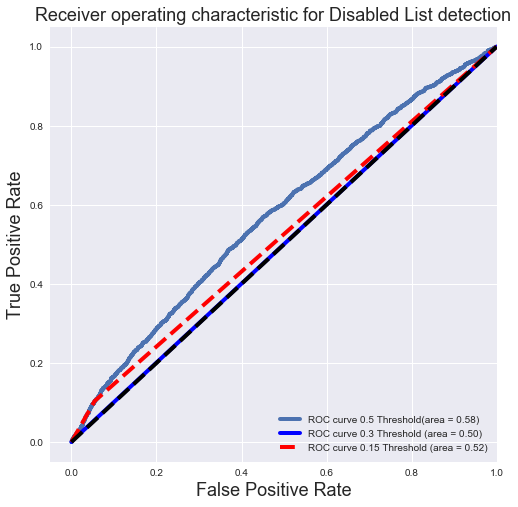

In [86]:
plt.figure(figsize=[8,8])
plt.plot(fpr_logreg50, tpr_logreg50, label='ROC curve 0.5 Threshold(area = %0.2f)' % roc_auc_logreg50, linewidth=4)
plt.plot(fpr_logreg30, tpr_logreg30, 'b-',label='ROC curve 0.3 Threshold (area = %0.2f)' % roc_auc_logreg30, linewidth=4)
plt.plot(fpr_logreg15, tpr_logreg15,'r--',label='ROC curve 0.15 Threshold (area = %0.2f)' % roc_auc_logreg15, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Disabled List detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

--- 


# Cross Validate with a K-Neighbors Classifier: 
Better at Finding True Positives, with a few False Positives Thrown In

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train_s,y_train)
cross_val_score(knn, X_test_s,y_test, cv=10).mean()

array([ 0.86730205,  0.87096774,  0.87527513,  0.86793837,  0.87380778,
        0.87298091,  0.8722467 ,  0.8773862 ,  0.87151248,  0.87371512])

In [95]:
cross_val_score(knn, X_test_s,y_test, cv=10).mean()

KeyboardInterrupt: 

In [46]:
y_preds_knn =knn.predict(X_test_s)

### Confusion Matrix to See Numbers of False Positives and Negatives

In [68]:
conmat_knn = confusion_matrix(y_pred=y_preds_knn, y_true=y_test)
print(conmat_knn)

[[11863   149]
 [ 1588    27]]


### Accuracy Score & Other Classification Reports

In [69]:
accuracy_score(y_pred=y_preds_knn, y_true=y_test)

0.87253247229764441

In [70]:
recall_score(y_test,y_preds_knn)

0.016718266253869969

In [71]:
print(classification_report(y_test,y_preds_knn))

             precision    recall  f1-score   support

          0       0.88      0.99      0.93     12012
          1       0.15      0.02      0.03      1615

avg / total       0.80      0.87      0.82     13627



### Change the Threshhold

In [72]:
y_pp_knn = knn.predict_proba(X_test_s)
confusion_knn = pd.DataFrame(conmat_knn, 
                         index=['had_no_DL_after','had_a_DL_after'],
                        columns=['pred_no_DL','pred_a_DL'])
confusion_knn

pred_no_DL  pred_a_DL
had_no_DL_after       11863        149
had_a_DL_after         1588         27

In [73]:
y_pp_knn = pd.DataFrame(y_pp_knn,
                    columns=['class_0_pp','class_1_pp'])
y_pp_knn.head()

class_0_pp  class_1_pp
0         1.0         0.0
1         1.0         0.0
2         1.0         0.0
3         0.8         0.2
4         1.0         0.0

### IF we want to change the threshhold from 50/50, to reduce num of false negs, we need to move threshhold to left, like 10%, Add a new column to dataframe we just created and call it predicted class threshhold 10

In [74]:
y_pp_knn['pred_class_thresh10'] = [1 if x >= .1 else 0 for x in y_pp_knn.class_1_pp.values]
#Going down 1 class values, list of predicted probabiliteis, reduced it by
  # returning a 1 if that pp value >= 0.1
y_pp_knn.head()

class_0_pp  class_1_pp  pred_class_thresh10
0         1.0         0.0                    0
1         1.0         0.0                    0
2         1.0         0.0                    0
3         0.8         0.2                    1
4         1.0         0.0                    0

In [76]:
conmat_knn = confusion_matrix(y_test, y_pp_knn.pred_class_thresh10)
confusion_knn = pd.DataFrame(conmat_knn, 
                         index=['had_no_DL_after','had_a_DL_after'],
                         columns=['pred_no_DL','pred_a_DL'])
confusion_knn

pred_no_DL  pred_a_DL
had_no_DL_after        6924       5088
had_a_DL_after          890        725

In [77]:
y_pp_knn['pred_class_thresh30'] = [1 if x >= .3 else 0 for x in y_pp_knn.class_1_pp.values]
#Going down 1 class values, list of predicted probabiliteis, reduced it by
  # returning a 1 if that pp value >= 0.1
y_pp_knn.head()

class_0_pp  class_1_pp  pred_class_thresh10  pred_class_thresh30
0         1.0         0.0                    0                    0
1         1.0         0.0                    0                    0
2         1.0         0.0                    0                    0
3         0.8         0.2                    1                    0
4         1.0         0.0                    0                    0

In [79]:
conmat_knn = confusion_matrix(y_test, y_pp_knn.pred_class_thresh30)
confusion_knn = pd.DataFrame(conmat_knn, 
                         index=['had_no_DL_after','had_a_DL_after'],
                         columns=['pred_no_DL','pred_a_DL'])
confusion_knn

pred_no_DL  pred_a_DL
had_no_DL_after       10819       1193
had_a_DL_after         1431        184

In [80]:
y_pp_knn['pred_class_thresh20'] = [1 if x >= .2 else 0 for x in y_pp_knn.class_1_pp.values]
#Going down 1 class values, list of predicted probabiliteis, reduced it by
  # returning a 1 if that pp value >= 0.1
conmat_knn = confusion_matrix(y_test, y_pp_knn.pred_class_thresh20)
confusion_knn = pd.DataFrame(conmat_knn, 
                         index=['had_no_DL_after','had_a_DL_after'],
                         columns=['pred_no_DL','pred_a_DL'])
confusion_knn

pred_no_DL  pred_a_DL
had_no_DL_after        6924       5088
had_a_DL_after          890        725

### Find the Area Under the Curve for the K-NN ROC: 50.7% - 51.4%

In [83]:
# ROC Curve outputs three arrays: fpr, tpr, thresh
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, y_pp_knn.class_1_pp)

# Use the AUC method and false positive rate and true positive rate obtained from the roc_curve()
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_knn

# ROC Curve outputs three arrays: fpr, tpr, thresh
fpr_knn_50, tpr_knn_50, thresh_knn_50 = roc_curve(y_test, y_pp_knn.class_1_pp)
fpr_knn_10, tpr_knn_10, thresh_knn_10 = roc_curve(y_test, y_pp_knn.pred_class_thresh10)
fpr_knn_20, tpr_knn_20, thresh_knn_20 = roc_curve(y_test, y_pp_knn.pred_class_thresh20)
fpr_knn_30, tpr_knn_30, thresh_knn_30 = roc_curve(y_test, y_pp_knn.pred_class_thresh30)



# Use the AUC method and false positive rate and true positive rate obtained from the roc_curve()
roc_auc_knn_50 = auc(fpr_knn_50, tpr_knn_50)
roc_auc_knn_10 = auc(fpr_knn_10, tpr_knn_10)
roc_auc_knn_20 = auc(fpr_knn_20, tpr_knn_20)
roc_auc_knn_30 = auc(fpr_knn_30, tpr_knn_30)
print('.50:',roc_auc_knn_50, '.10:',roc_auc_knn_10, '.20:',roc_auc_knn_20, '.30:',roc_auc_knn_30)

.50: 0.514624848835 .10: 0.512669992546 .20: 0.512669992546 .30: 0.507307269614


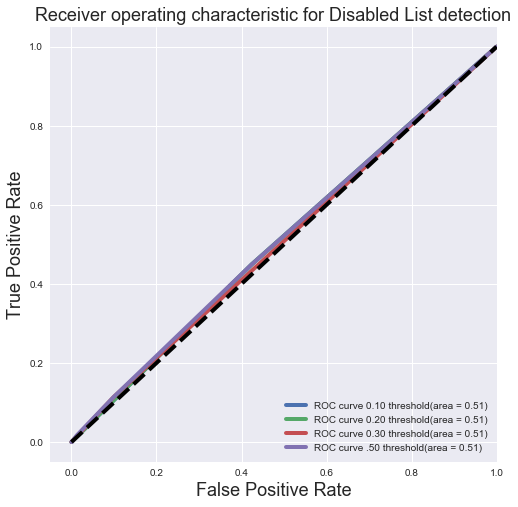

In [85]:
plt.figure(figsize=[8,8])
plt.plot(fpr_knn_10, tpr_knn_10, label='ROC curve 0.10 threshold(area = %0.2f)' % roc_auc_knn_10, linewidth=4)
plt.plot(fpr_knn_20, tpr_knn_20, label='ROC curve 0.20 threshold(area = %0.2f)' % roc_auc_knn_20, linewidth=4)
plt.plot(fpr_knn_30, tpr_knn_30, label='ROC curve 0.30 threshold(area = %0.2f)' % roc_auc_knn_30, linewidth=4)
plt.plot(fpr_knn_50, tpr_knn_50, label='ROC curve .50 threshold(area = %0.2f)' % roc_auc_knn_50, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Disabled List detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

--- 


# Cross Validate with a Random Forest Classifier

In [87]:
clf = RandomForestClassifier()

In [88]:
clf.fit(X_train_s, y_train)
cross_val_score(clf, X_train_s, y_train, cv=5).mean()

0.87977588044374144

In [89]:
cross_val_score(clf, X_test_s, y_test, cv=5).mean()

0.88031121312269889

In [90]:
clf_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

grid = GridSearchCV(clf, param_grid=clf_grid,n_jobs=-1, verbose=2)

In [91]:
grid.fit(X_train_s, y_train)
print(grid.score(X_test_s, y_test))
print(grid.best_params_)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
[CV] max_depth=1, min_samples_leaf=1, n_estimators=9 .................
[CV] max_depth=1, min_samples_leaf=1, n_estimators=9 .................
[CV] .. max_depth=1, min_samples_leaf=1, n_estimators=9, total=   0.7s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=9 .................
[CV] .. max_depth=1, min_samples_leaf=1, n_estimators=9, total=   0.8s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=18 ................
[CV] .. max_depth=1, min_samples_leaf=1, n_estimators=9, total=   0.7s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=18 ................
[CV] . max_depth=1, min_samples_leaf=1, n_estimators=18, total=   1.0s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=18 ................
[CV] . max_depth=1, min_samples_leaf=1, n_estimators=18, total=   1.1s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=27 ................
[CV] . max_depth=1, min_samples_leaf=1, n_estimators=18, total=   1.1s
[CV] max_depth

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   31.1s


[CV] . max_depth=1, min_samples_leaf=2, n_estimators=54, total=   2.4s
[CV] max_depth=1, min_samples_leaf=2, n_estimators=63 ................
[CV] . max_depth=1, min_samples_leaf=2, n_estimators=54, total=   3.0s
[CV] max_depth=1, min_samples_leaf=2, n_estimators=63 ................
[CV] . max_depth=1, min_samples_leaf=2, n_estimators=63, total=   3.3s
[CV] max_depth=1, min_samples_leaf=2, n_estimators=63 ................
[CV] . max_depth=1, min_samples_leaf=2, n_estimators=63, total=   3.2s
[CV] max_depth=1, min_samples_leaf=4, n_estimators=9 .................
[CV] .. max_depth=1, min_samples_leaf=4, n_estimators=9, total=   1.1s
[CV] max_depth=1, min_samples_leaf=4, n_estimators=9 .................
[CV] . max_depth=1, min_samples_leaf=2, n_estimators=63, total=   3.4s
[CV] .. max_depth=1, min_samples_leaf=4, n_estimators=9, total=   0.9s
[CV] max_depth=1, min_samples_leaf=4, n_estimators=9 .................
[CV] max_depth=1, min_samples_leaf=4, n_estimators=18 ................
[CV] .

[CV] . max_depth=1, min_samples_leaf=8, n_estimators=36, total=   2.3s
[CV] max_depth=1, min_samples_leaf=8, n_estimators=45 ................
[CV] . max_depth=1, min_samples_leaf=8, n_estimators=45, total=   2.0s
[CV] max_depth=1, min_samples_leaf=8, n_estimators=45 ................
[CV] . max_depth=1, min_samples_leaf=8, n_estimators=45, total=   1.8s
[CV] max_depth=1, min_samples_leaf=8, n_estimators=54 ................
[CV] . max_depth=1, min_samples_leaf=8, n_estimators=45, total=   1.6s
[CV] max_depth=1, min_samples_leaf=8, n_estimators=54 ................
[CV] . max_depth=1, min_samples_leaf=8, n_estimators=54, total=   1.6s
[CV] max_depth=1, min_samples_leaf=8, n_estimators=54 ................
[CV] . max_depth=1, min_samples_leaf=8, n_estimators=54, total=   1.5s
[CV] max_depth=1, min_samples_leaf=8, n_estimators=63 ................
[CV] . max_depth=1, min_samples_leaf=8, n_estimators=54, total=   1.2s
[CV] max_depth=1, min_samples_leaf=8, n_estimators=63 ................
[CV] .

[CV] . max_depth=5, min_samples_leaf=2, n_estimators=27, total=   1.7s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=27 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=27, total=   1.6s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=36 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=27, total=   1.9s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=36 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=36, total=   2.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=36 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=36, total=   2.1s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=45 ................


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min


[CV] . max_depth=5, min_samples_leaf=2, n_estimators=36, total=   2.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=45 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=45, total=   2.8s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=45 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=45, total=   2.7s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=54 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=45, total=   2.9s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=54 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=54, total=   4.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=54 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=54, total=   5.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=63 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=54, total=   3.3s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=63 ................
[CV] .

[CV] . max_depth=5, min_samples_leaf=8, n_estimators=27, total=   1.9s
[CV] max_depth=5, min_samples_leaf=8, n_estimators=27 ................
[CV] . max_depth=5, min_samples_leaf=8, n_estimators=27, total=   1.6s
[CV] max_depth=5, min_samples_leaf=8, n_estimators=36 ................
[CV] . max_depth=5, min_samples_leaf=8, n_estimators=27, total=   1.6s
[CV] max_depth=5, min_samples_leaf=8, n_estimators=36 ................
[CV] . max_depth=5, min_samples_leaf=8, n_estimators=36, total=   2.2s
[CV] max_depth=5, min_samples_leaf=8, n_estimators=36 ................
[CV] . max_depth=5, min_samples_leaf=8, n_estimators=36, total=   2.3s
[CV] max_depth=5, min_samples_leaf=8, n_estimators=45 ................
[CV] . max_depth=5, min_samples_leaf=8, n_estimators=36, total=   2.1s
[CV] max_depth=5, min_samples_leaf=8, n_estimators=45 ................
[CV] . max_depth=5, min_samples_leaf=8, n_estimators=45, total=   2.4s
[CV] max_depth=5, min_samples_leaf=8, n_estimators=45 ................
[CV] .

[CV]  max_depth=10, min_samples_leaf=1, n_estimators=63, total=   7.1s
[CV] max_depth=10, min_samples_leaf=2, n_estimators=18 ...............
[CV] . max_depth=10, min_samples_leaf=2, n_estimators=9, total=   1.3s
[CV] max_depth=10, min_samples_leaf=2, n_estimators=18 ...............
[CV]  max_depth=10, min_samples_leaf=2, n_estimators=18, total=   2.1s
[CV] max_depth=10, min_samples_leaf=2, n_estimators=18 ...............
[CV]  max_depth=10, min_samples_leaf=2, n_estimators=18, total=   1.8s
[CV] max_depth=10, min_samples_leaf=2, n_estimators=27 ...............
[CV]  max_depth=10, min_samples_leaf=2, n_estimators=18, total=   1.7s
[CV] max_depth=10, min_samples_leaf=2, n_estimators=27 ...............
[CV]  max_depth=10, min_samples_leaf=2, n_estimators=27, total=   2.7s
[CV] max_depth=10, min_samples_leaf=2, n_estimators=27 ...............
[CV]  max_depth=10, min_samples_leaf=2, n_estimators=27, total=   2.9s
[CV] max_depth=10, min_samples_leaf=2, n_estimators=36 ...............
[CV]  

[CV]  max_depth=10, min_samples_leaf=6, n_estimators=54, total=  10.5s
[CV] max_depth=10, min_samples_leaf=6, n_estimators=63 ...............
[CV]  max_depth=10, min_samples_leaf=6, n_estimators=63, total=   8.7s
[CV] max_depth=10, min_samples_leaf=6, n_estimators=63 ...............
[CV]  max_depth=10, min_samples_leaf=6, n_estimators=63, total=   5.6s
[CV] max_depth=10, min_samples_leaf=8, n_estimators=9 ................
[CV] . max_depth=10, min_samples_leaf=8, n_estimators=9, total=   1.3s
[CV] max_depth=10, min_samples_leaf=8, n_estimators=9 ................
[CV] . max_depth=10, min_samples_leaf=8, n_estimators=9, total=   0.9s
[CV] max_depth=10, min_samples_leaf=8, n_estimators=9 ................
[CV]  max_depth=10, min_samples_leaf=6, n_estimators=63, total=   5.7s
[CV] max_depth=10, min_samples_leaf=8, n_estimators=18 ...............
[CV] . max_depth=10, min_samples_leaf=8, n_estimators=9, total=   1.9s
[CV] max_depth=10, min_samples_leaf=8, n_estimators=18 ...............
[CV]  

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.6min


[CV]  max_depth=10, min_samples_leaf=10, n_estimators=18, total=   1.8s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=27 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=18, total=   1.7s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=27 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=27, total=   2.3s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=27 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=27, total=   2.2s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=36 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=27, total=   2.4s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=36 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=36, total=   3.0s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=36 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=36, total=   3.8s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=45 ..............

[CV] . max_depth=15, min_samples_leaf=4, n_estimators=9, total=   2.0s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=9 ................
[CV] . max_depth=15, min_samples_leaf=4, n_estimators=9, total=   2.5s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=9 ................
[CV]  max_depth=15, min_samples_leaf=2, n_estimators=63, total=   8.9s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=18 ...............
[CV] . max_depth=15, min_samples_leaf=4, n_estimators=9, total=   2.4s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=18 ...............
[CV]  max_depth=15, min_samples_leaf=4, n_estimators=18, total=   4.1s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=18 ...............
[CV]  max_depth=15, min_samples_leaf=4, n_estimators=18, total=   4.4s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=27 ...............
[CV]  max_depth=15, min_samples_leaf=4, n_estimators=18, total=   3.8s
[CV] max_depth=15, min_samples_leaf=4, n_estimators=27 ...............
[CV]  

[CV]  max_depth=15, min_samples_leaf=8, n_estimators=54, total=   4.7s
[CV] max_depth=15, min_samples_leaf=8, n_estimators=54 ...............
[CV]  max_depth=15, min_samples_leaf=8, n_estimators=54, total=   4.7s
[CV] max_depth=15, min_samples_leaf=8, n_estimators=63 ...............
[CV]  max_depth=15, min_samples_leaf=8, n_estimators=54, total=   4.8s
[CV] max_depth=15, min_samples_leaf=8, n_estimators=63 ...............
[CV]  max_depth=15, min_samples_leaf=8, n_estimators=63, total=   8.0s
[CV] max_depth=15, min_samples_leaf=8, n_estimators=63 ...............
[CV]  max_depth=15, min_samples_leaf=8, n_estimators=63, total=   7.0s
[CV] max_depth=15, min_samples_leaf=10, n_estimators=9 ...............
[CV]  max_depth=15, min_samples_leaf=10, n_estimators=9, total=   1.1s
[CV] max_depth=15, min_samples_leaf=10, n_estimators=9 ...............
[CV]  max_depth=15, min_samples_leaf=10, n_estimators=9, total=   1.1s
[CV] max_depth=15, min_samples_leaf=10, n_estimators=9 ...............
[CV]  

[CV]  max_depth=20, min_samples_leaf=2, n_estimators=36, total=   6.1s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=45 ...............
[CV]  max_depth=20, min_samples_leaf=2, n_estimators=36, total=   4.9s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=45 ...............
[CV]  max_depth=20, min_samples_leaf=2, n_estimators=45, total=   5.0s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=45 ...............
[CV]  max_depth=20, min_samples_leaf=2, n_estimators=45, total=   4.8s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=54 ...............
[CV]  max_depth=20, min_samples_leaf=2, n_estimators=45, total=   4.8s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=54 ...............
[CV]  max_depth=20, min_samples_leaf=2, n_estimators=54, total=   5.7s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=54 ...............
[CV]  max_depth=20, min_samples_leaf=2, n_estimators=54, total=   6.0s
[CV] max_depth=20, min_samples_leaf=2, n_estimators=63 ...............
[CV]  

[CV]  max_depth=20, min_samples_leaf=8, n_estimators=18, total=   2.0s
[CV] max_depth=20, min_samples_leaf=8, n_estimators=27 ...............
[CV]  max_depth=20, min_samples_leaf=8, n_estimators=27, total=   2.6s
[CV] max_depth=20, min_samples_leaf=8, n_estimators=27 ...............
[CV]  max_depth=20, min_samples_leaf=8, n_estimators=27, total=   2.6s
[CV] max_depth=20, min_samples_leaf=8, n_estimators=36 ...............
[CV]  max_depth=20, min_samples_leaf=8, n_estimators=27, total=   2.6s
[CV] max_depth=20, min_samples_leaf=8, n_estimators=36 ...............
[CV]  max_depth=20, min_samples_leaf=8, n_estimators=36, total=   3.4s
[CV] max_depth=20, min_samples_leaf=8, n_estimators=36 ...............
[CV]  max_depth=20, min_samples_leaf=8, n_estimators=36, total=   3.4s
[CV] max_depth=20, min_samples_leaf=8, n_estimators=45 ...............
[CV]  max_depth=20, min_samples_leaf=8, n_estimators=36, total=   3.1s
[CV] max_depth=20, min_samples_leaf=8, n_estimators=45 ...............
[CV]  

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 309.9min


[CV]  max_depth=25, min_samples_leaf=1, n_estimators=45, total=   4.7s
[CV] max_depth=25, min_samples_leaf=1, n_estimators=54 ...............
[CV]  max_depth=25, min_samples_leaf=1, n_estimators=54, total=   5.7s
[CV] max_depth=25, min_samples_leaf=1, n_estimators=54 ...............
[CV]  max_depth=25, min_samples_leaf=1, n_estimators=54, total=   5.7s
[CV] max_depth=25, min_samples_leaf=1, n_estimators=63 ...............
[CV]  max_depth=25, min_samples_leaf=1, n_estimators=54, total=   5.7s
[CV] max_depth=25, min_samples_leaf=1, n_estimators=63 ...............
[CV]  max_depth=25, min_samples_leaf=1, n_estimators=63, total=   6.6s
[CV] max_depth=25, min_samples_leaf=1, n_estimators=63 ...............
[CV]  max_depth=25, min_samples_leaf=1, n_estimators=63, total=   6.6s
[CV] max_depth=25, min_samples_leaf=2, n_estimators=9 ................
[CV] . max_depth=25, min_samples_leaf=2, n_estimators=9, total=   1.2s
[CV] max_depth=25, min_samples_leaf=2, n_estimators=9 ................
[CV] .

[CV]  max_depth=25, min_samples_leaf=6, n_estimators=36, total=   3.5s
[CV] max_depth=25, min_samples_leaf=6, n_estimators=36 ...............
[CV]  max_depth=25, min_samples_leaf=6, n_estimators=36, total=   5.2s
[CV] max_depth=25, min_samples_leaf=6, n_estimators=45 ...............
[CV]  max_depth=25, min_samples_leaf=6, n_estimators=36, total=   5.3s
[CV] max_depth=25, min_samples_leaf=6, n_estimators=45 ...............
[CV]  max_depth=25, min_samples_leaf=6, n_estimators=45, total=   4.6s
[CV] max_depth=25, min_samples_leaf=6, n_estimators=45 ...............
[CV]  max_depth=25, min_samples_leaf=6, n_estimators=45, total=   4.5s
[CV] max_depth=25, min_samples_leaf=6, n_estimators=54 ...............
[CV]  max_depth=25, min_samples_leaf=6, n_estimators=45, total=   4.4s
[CV] max_depth=25, min_samples_leaf=6, n_estimators=54 ...............
[CV]  max_depth=25, min_samples_leaf=6, n_estimators=54, total=   5.1s
[CV] max_depth=25, min_samples_leaf=6, n_estimators=54 ...............
[CV]  

[CV]  max_depth=30, min_samples_leaf=1, n_estimators=18, total=   2.3s
[CV] max_depth=30, min_samples_leaf=1, n_estimators=27 ...............
[CV]  max_depth=30, min_samples_leaf=1, n_estimators=18, total=   2.3s
[CV] max_depth=30, min_samples_leaf=1, n_estimators=27 ...............
[CV]  max_depth=30, min_samples_leaf=1, n_estimators=27, total=   3.2s
[CV] max_depth=30, min_samples_leaf=1, n_estimators=27 ...............
[CV]  max_depth=30, min_samples_leaf=1, n_estimators=27, total=   3.2s
[CV] max_depth=30, min_samples_leaf=1, n_estimators=36 ...............
[CV]  max_depth=30, min_samples_leaf=1, n_estimators=27, total=   3.3s
[CV] max_depth=30, min_samples_leaf=1, n_estimators=36 ...............
[CV]  max_depth=30, min_samples_leaf=1, n_estimators=36, total=   4.0s
[CV] max_depth=30, min_samples_leaf=1, n_estimators=36 ...............
[CV]  max_depth=30, min_samples_leaf=1, n_estimators=36, total=   4.2s
[CV] max_depth=30, min_samples_leaf=1, n_estimators=45 ...............
[CV]  

[CV] . max_depth=30, min_samples_leaf=6, n_estimators=9, total=   1.1s
[CV] max_depth=30, min_samples_leaf=6, n_estimators=9 ................
[CV] . max_depth=30, min_samples_leaf=6, n_estimators=9, total=   1.1s
[CV] max_depth=30, min_samples_leaf=6, n_estimators=9 ................
[CV]  max_depth=30, min_samples_leaf=4, n_estimators=63, total=   6.3s
[CV] max_depth=30, min_samples_leaf=6, n_estimators=18 ...............
[CV] . max_depth=30, min_samples_leaf=6, n_estimators=9, total=   1.2s
[CV] max_depth=30, min_samples_leaf=6, n_estimators=18 ...............
[CV]  max_depth=30, min_samples_leaf=6, n_estimators=18, total=   2.0s
[CV] max_depth=30, min_samples_leaf=6, n_estimators=18 ...............
[CV]  max_depth=30, min_samples_leaf=6, n_estimators=18, total=   2.0s
[CV] max_depth=30, min_samples_leaf=6, n_estimators=27 ...............
[CV]  max_depth=30, min_samples_leaf=6, n_estimators=18, total=   1.9s
[CV] max_depth=30, min_samples_leaf=6, n_estimators=27 ...............
[CV]  

[CV]  max_depth=30, min_samples_leaf=10, n_estimators=54, total=   4.8s
[CV] max_depth=30, min_samples_leaf=10, n_estimators=54 ..............
[CV]  max_depth=30, min_samples_leaf=10, n_estimators=54, total=   4.8s
[CV] max_depth=30, min_samples_leaf=10, n_estimators=63 ..............
[CV]  max_depth=30, min_samples_leaf=10, n_estimators=54, total=   6.3s
[CV] max_depth=30, min_samples_leaf=10, n_estimators=63 ..............
[CV]  max_depth=30, min_samples_leaf=10, n_estimators=63, total=   8.0s
[CV] max_depth=30, min_samples_leaf=10, n_estimators=63 ..............
[CV]  max_depth=30, min_samples_leaf=10, n_estimators=63, total=   6.4s
[CV]  max_depth=30, min_samples_leaf=10, n_estimators=63, total=   5.3s


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed: 319.1min finished


0.881705437734
{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 9}


In [92]:
y_pp_clf = pd.DataFrame(clf.predict_proba(X_test_s),
                    columns=['class_0_pp','class_1_pp'])

# ROC Curve outputs three arrays: fpr, tpr, thresh
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, y_pp_clf.class_1_pp)

### Calculate the Area Under the Curve for the ROC: 51.6%

In [93]:
# Use the AUC method and false positive rate and true positive rate obtained from the roc_curve()
roc_auc_clf = auc(fpr_clf, tpr_clf)
roc_auc_clf

0.56767636388379417

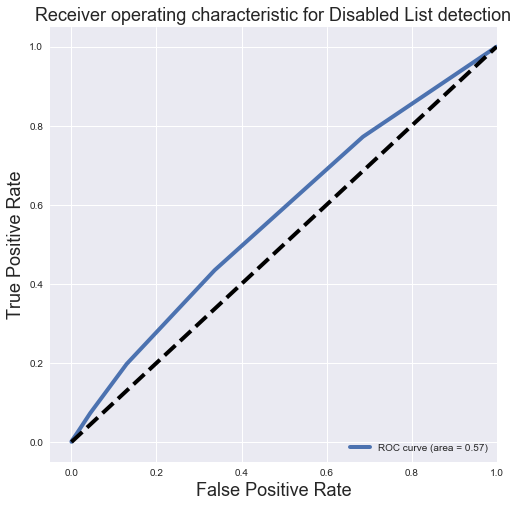

In [94]:
plt.figure(figsize=[8,8])
plt.plot(fpr_clf, tpr_clf, label='ROC curve (area = %0.2f)' % roc_auc_clf, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Disabled List detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [97]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X, y)
print(X_resampled.shape, y_resampled.shape)

(72798, 180) (72798,)


In [98]:
X_res_train, X_res_test, y_res_train, y_res_test =train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [99]:
clf.fit(X_res_train, y_res_train)
cross_val_score(clf, X_res_train, y_res_train, cv=5).mean()

0.96645760002032421

In [101]:
# Not an improvement on the accuracy score over the test data
cross_val_score(clf, X_res_test, y_res_test, cv=5).mean()

0.86538540740071035

## Cross Validate with SVM

In [102]:
# The kernel is automatically Gaussian
clf_svc = SVC()
clf_svc.fit(X_train_s, y_train)
print('Mean Accuracy Score for Training Data')
print(cross_val_score(clf_svc, X_train_s, y_train, cv=5).mean())
print('Mean Accuracy Score for Testing Data')
print(cross_val_score(clf_svc, X_test_s, y_test, cv=5).mean())


KeyboardInterrupt: 

In [ ]:
y_pp_clf_svc = pd.DataFrame(clf_svc.predict_proba(X_test_s),
                    columns=['class_0_pp','class_1_pp'])

# ROC Curve outputs three arrays: fpr, tpr, thresh
fpr_clf_svc, tpr_clf_svc, thresh_clf_svc = roc_curve(y_test, y_pp_clf_svc.class_1_pp)
roc_auc_clf_svc = auc(fpr_clf_svc, tpr_clf_svc)

In [ ]:
plt.figure(figsize=[8,8])
plt.plot(fpr_clf_svc, tpr_clf_svc, label='ROC curve (area = %0.2f)' % roc_auc_clf_svc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Disabled List detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting Trees: Best AUC
* Handle categorical features well
* Does not require scaling
* Can capture non-linearities and interactions

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_s, y_train)
cross_val_score(gbc, X_test_s, y_test, cv=5).mean()

0.88097149434261968

In [113]:
conmat_gbc = confusion_matrix(y_pred=gbc.predict(X_test_s), y_true=y_test)

y_pp_gbc = gbc.predict_proba(X_test_s)
confusion_gbc = pd.DataFrame(conmat_gbc, 
                         index=['had_no_DL_after','had_a_DL_after'],
                        columns=['pred_no_DL','pred_a_DL'])
confusion_gbc

pred_no_DL  pred_a_DL
had_no_DL_after       12005          7
had_a_DL_after         1607          8

In [114]:
y_pp_gbc = pd.DataFrame(y_pp_gbc, columns=['class_0_pp','class_1_pp'])
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_test, y_pp_gbc.class_1_pp)

# Use the AUC method and false positive rate and true positive rate obtained from the roc_curve()
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
roc_auc_gbc

0.6332241545863837

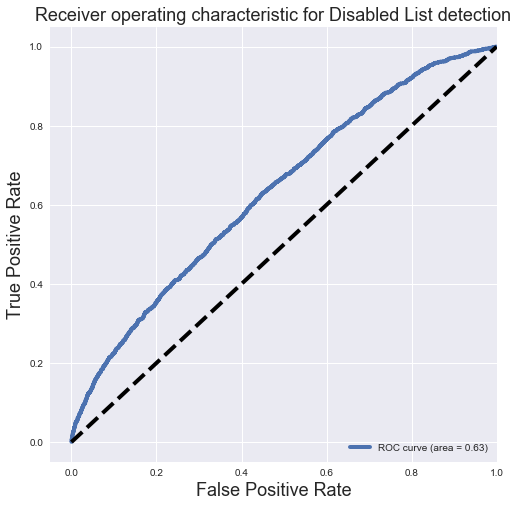

In [115]:
plt.figure(figsize=[8,8])
plt.plot(fpr_gbc, tpr_gbc, label='ROC curve (area = %0.2f)' % roc_auc_gbc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Disabled List detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## PCA for Decorrelation and Dimensionality Reduction:

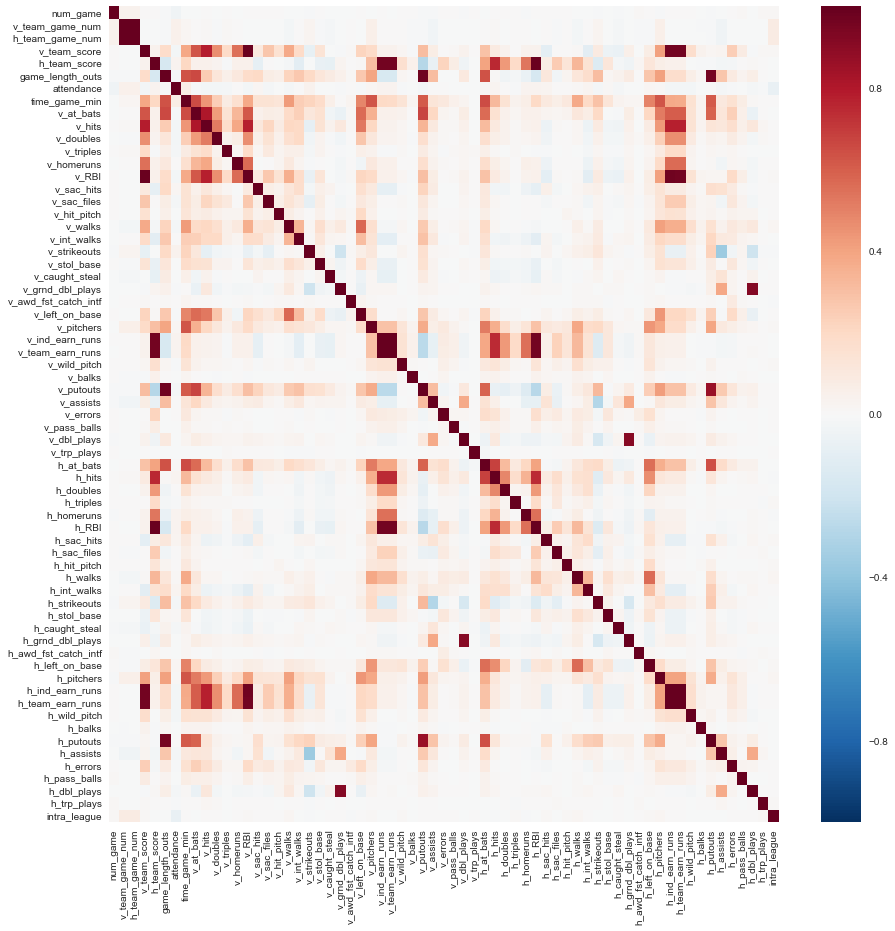

In [216]:
plt.figure(figsize=(15,15))
sns.heatmap(X.iloc[:,:65].corr())

In [223]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

In [220]:
df.shape

(41292, 181)

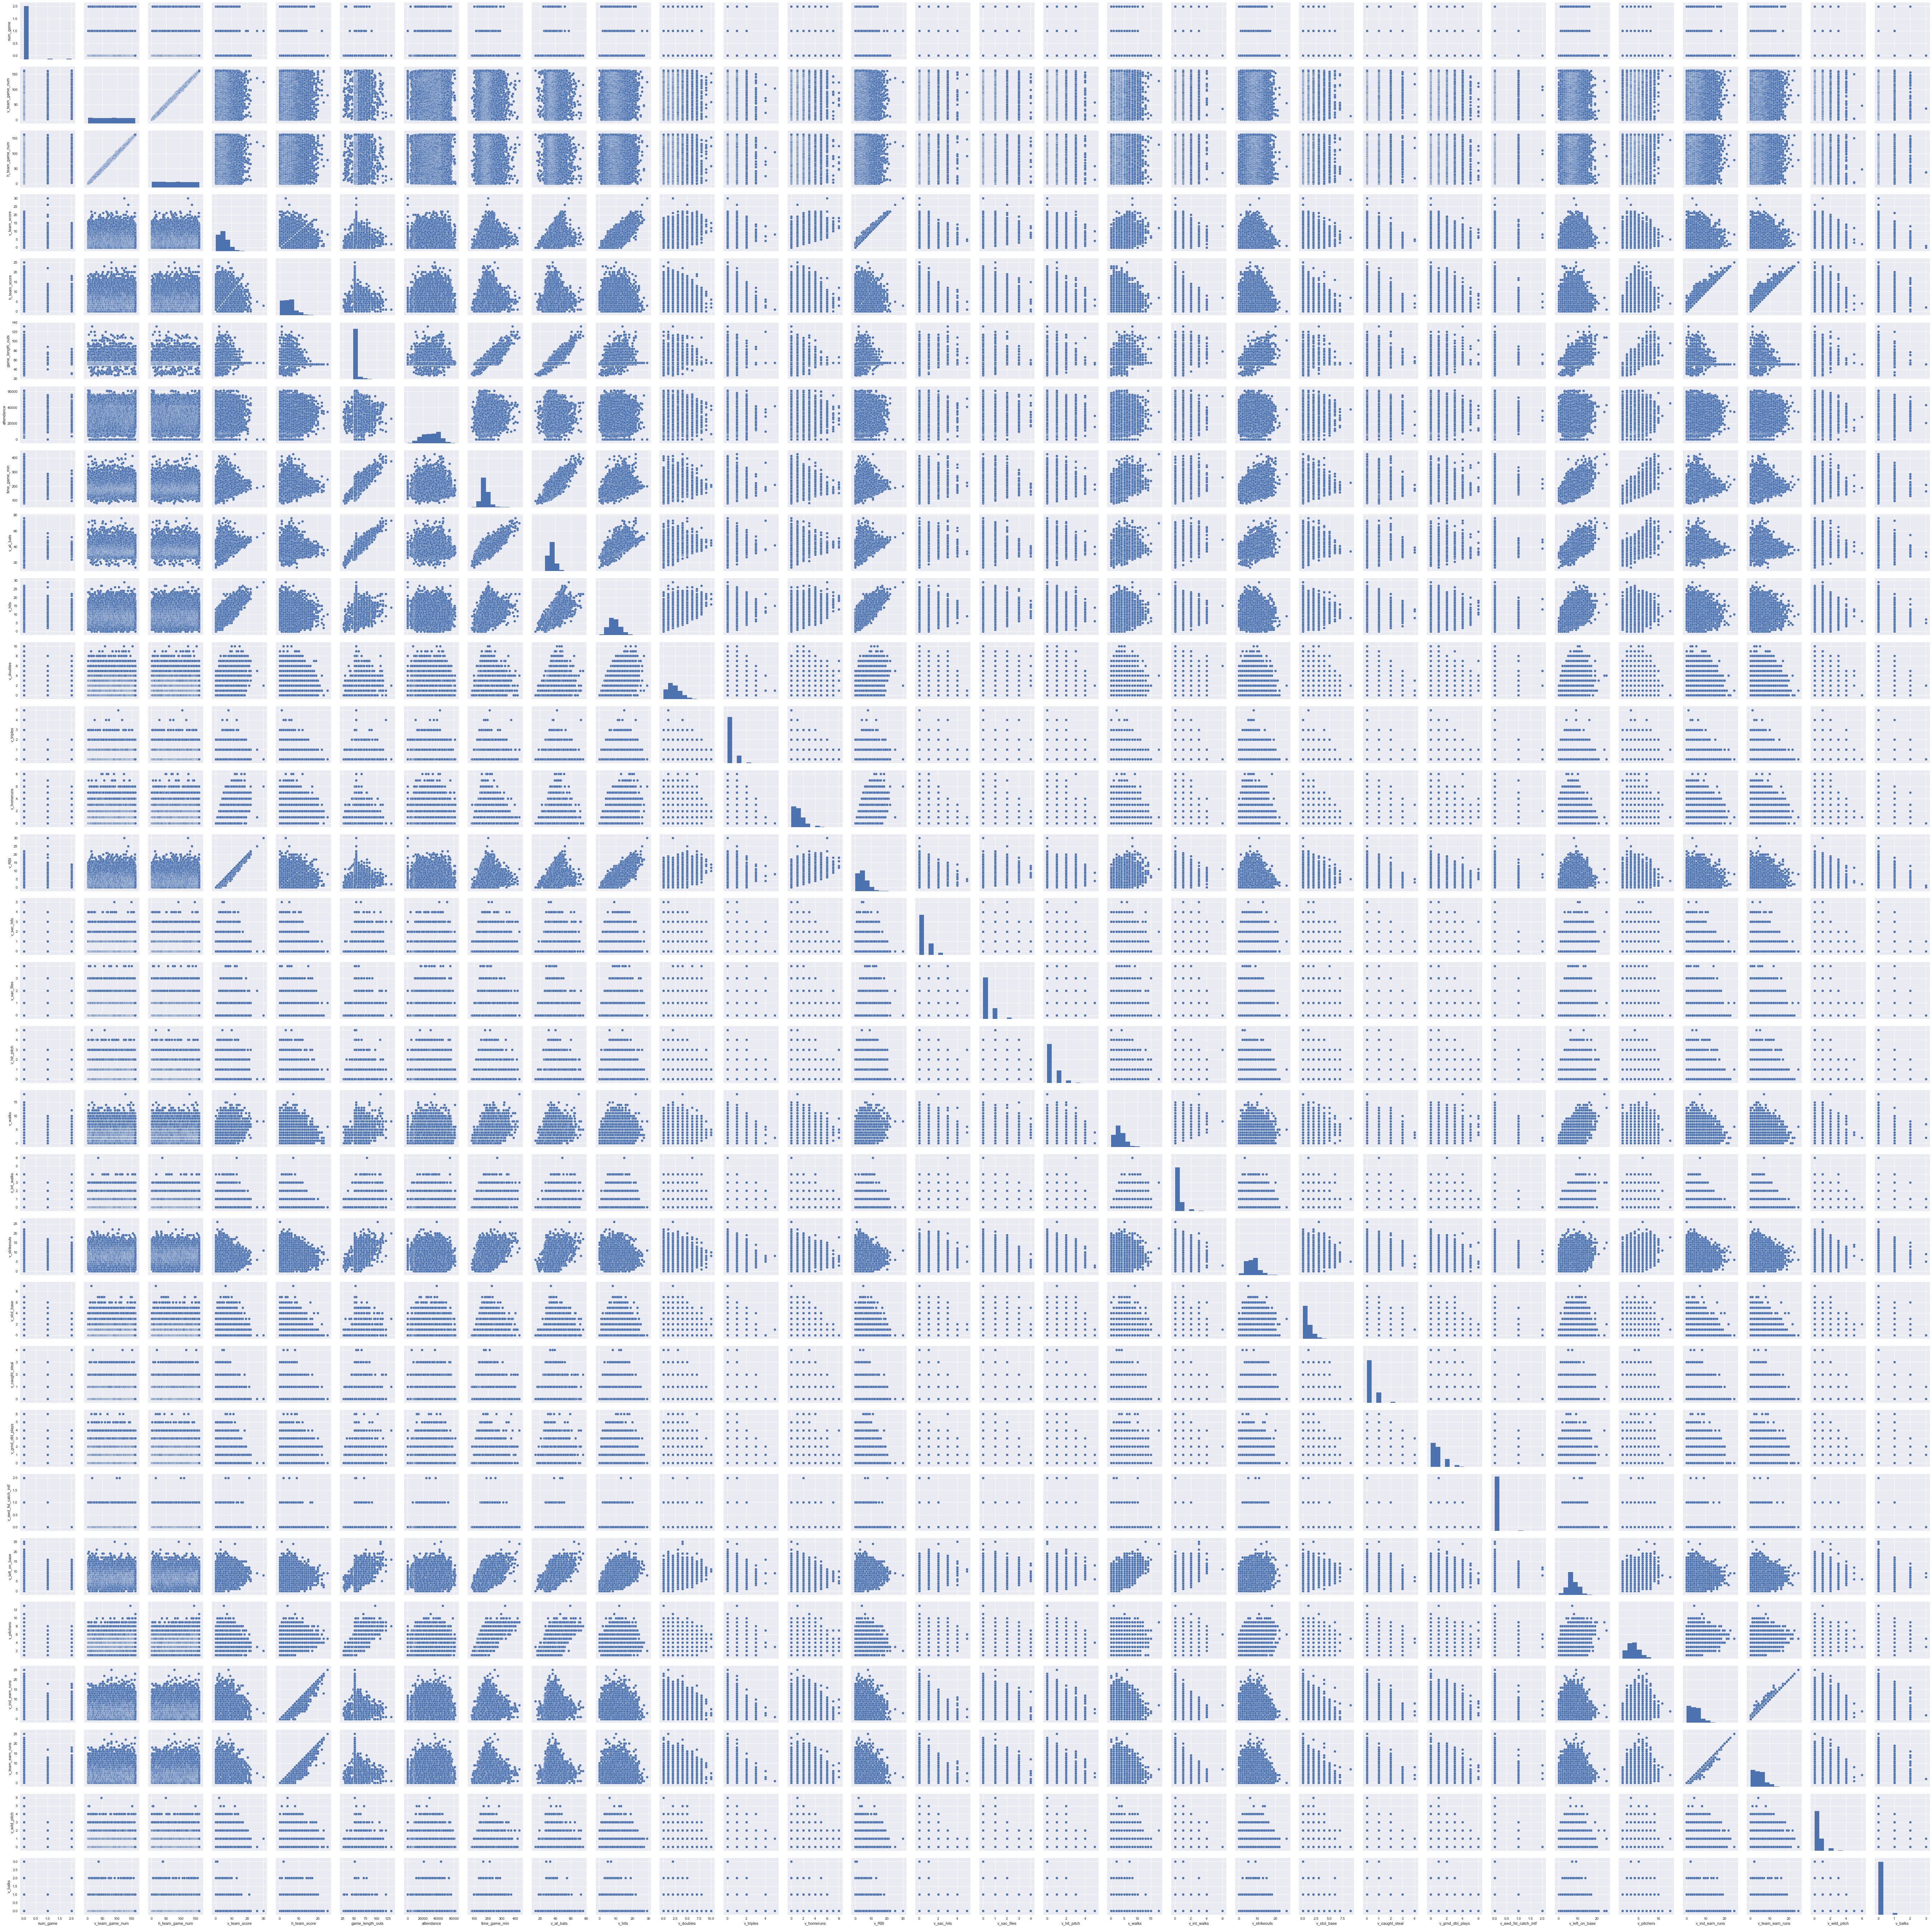

In [231]:
sns.pairplot(df.iloc[:,:30])

In [1]:
# Create PCA model
pca = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = pca.fit_transform(X_train_s)

# # Assign 0th column of pca_features: xs
# xs = pca_features[:,3]

# # Assign 1st column of pca_features: ys
# ys = pca_features[:,13]

# # Scatter plot xs vs ys
# plt.scatter(xs, ys)
# plt.axis('equal')
# plt.show()

# # Calculate the Pearson correlation of xs and ys
# correlation, pvalue = pearsonr(xs, ys)

# # Display the correlation reduction between just two features;
# print(correlation)

NameError: name 'PCA' is not defined

## Plotting the Intrinsic Dimension for the Dataset: 1 Intrinsic Dimension

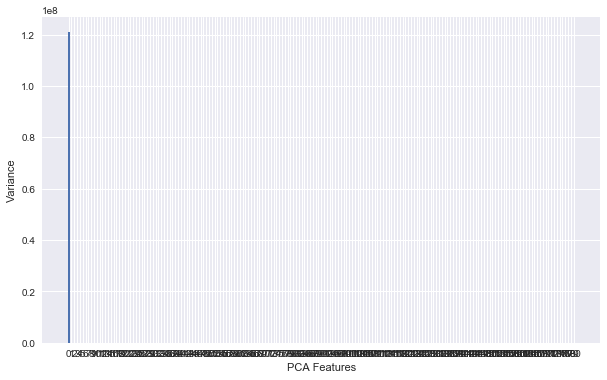

In [234]:
plt.figure(figsize=(10,6))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('Variance')
plt.xlabel('PCA Features')

In [235]:
pca_features.shape

(41292, 181)

In [ ]:
log